# Track 3: Healthcare ML - Day 1
## Objective: Load CMS Data and Explore Columns

In [12]:
#pip install scikit-learn


In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/shazi/Healthcare_Project/output/cleaned_cms_hospital_info.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   facility_id                                       5396 non-null   object 
 1   facility_name                                     5396 non-null   object 
 2   address                                           5396 non-null   object 
 3   city/town                                         5396 non-null   object 
 4   state                                             5396 non-null   object 
 5   zip_code                                          5396 non-null   int64  
 6   county/parish                                     5396 non-null   object 
 7   telephone_number                                  5396 non-null   object 
 8   hospital_type                                     5396 non-null   object 
 9   hospital_ownership 

,facility_id,facility_name,address,city/town,state,zip_code,county/parish,telephone_number,hospital_type,hospital_ownership,...,count_of_readm_measures_better,count_of_readm_measures_no_different,count_of_readm_measures_worse,readm_group_footnote,pt_exp_group_measure_count,count_of_facility_pt_exp_measures,pt_exp_group_footnote,te_group_measure_count,count_of_facility_te_measures,te_group_footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,1,8,2,NaN,8,8,NaN,12,10,NaN
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,8,1,NaN,8,8,NaN,12,12,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,Acute Care Hospitals,Proprietary,...,0,7,2,NaN,8,8,NaN,12,11,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,7,0,NaN,8,8,NaN,12,7,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,2,0,NaN,8,Not Available,5.0,12,6,NaN


In [2]:
#Check for nulls:
df.isnull().sum().sort_values(ascending=False)


te_group_footnote                                   4509
readm_group_footnote                                4315
mort_group_footnote                                 3527
safety_group_footnote                               3406
pt_exp_group_footnote                               3207
meets_criteria_for_birthing_friendly_designation    3163
hospital_overall_rating_footnote                    2777
state                                                  0
zip_code                                               0
address                                                0
facility_name                                          0
facility_id                                            0
city/town                                              0
county/parish                                          0
hospital_overall_rating                                0
mort_group_measure_count                               0
count_of_mort_measures_better                          0
count_of_facility_mort_measures

In [10]:
#Drop columns that are mostly null or irrelevant
#df = df.drop(columns=['hospital_overall_rating_footnote', 'mort_group_footnote'])


In [8]:
#Define Target Column: Let’s create a binary column:
df['count_of_readm_measures_worse'] = pd.to_numeric(
    df['count_of_readm_measures_worse'], errors='coerce'
)


In [11]:
df['readmission_flag'] = df['count_of_readm_measures_worse'].apply(lambda x: 1 if x > 0 else 0)


In [12]:
df = df.dropna(subset=['count_of_readm_measures_worse'])


In [13]:
df.to_csv("C:/Users/shazi/Healthcare_Project/data/cleaned_cms_ml.csv", index=False)


In [14]:
#check data types
df.dtypes


facility_id                                          object
facility_name                                        object
address                                              object
city/town                                            object
state                                                object
zip_code                                              int64
county/parish                                        object
telephone_number                                     object
hospital_type                                        object
hospital_ownership                                   object
emergency_services                                   object
meets_criteria_for_birthing_friendly_designation     object
hospital_overall_rating                              object
mort_group_measure_count                             object
count_of_facility_mort_measures                      object
count_of_mort_measures_better                        object
count_of_mort_measures_no_different     

In [15]:
#Select Features
features = [
    'hospital_type', 
    'hospital_ownership',
    'emergency_services',
    'count_of_facility_readm_measures'
]


In [16]:
#Convert categorical features to numeric
df_encoded = pd.get_dummies(df[features], drop_first=True)


In [17]:
#Combine with Target
X = df_encoded
y = df['readmission_flag']


In [18]:
#Save prepped data set
df_encoded['readmission_flag'] = y
df_encoded.to_csv("C:/Users/shazi/Healthcare_Project/data/preprocessed_readmission.csv", index=False)


In [20]:
#Model Training:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       288

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863



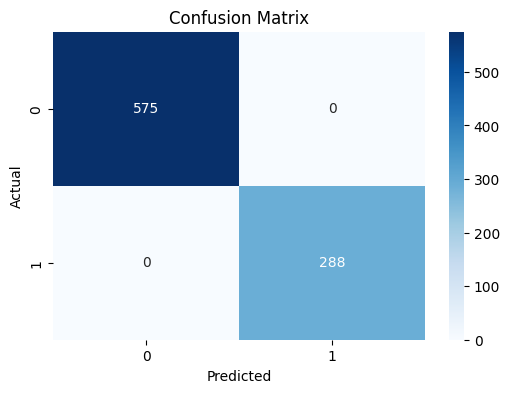

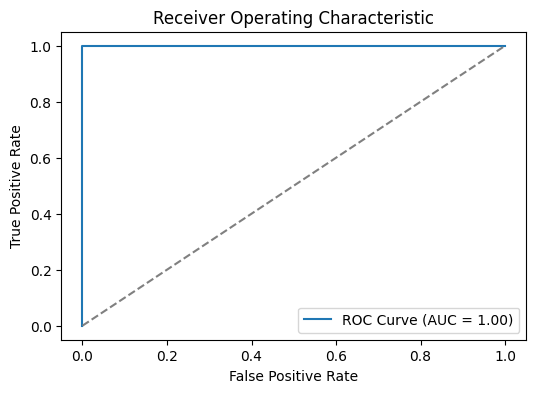

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


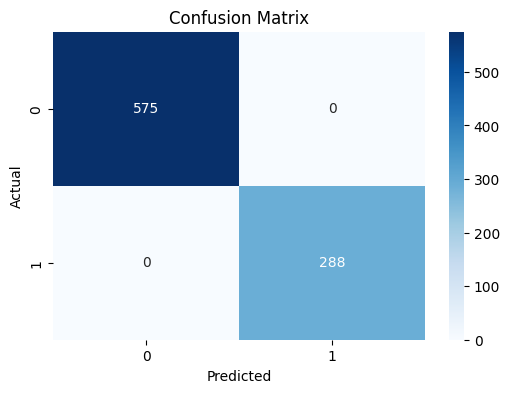

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [3]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 2. Load your preprocessed dataset
df = pd.read_csv("C:/Users/shazi/Healthcare_Project/data/preprocessed_readmission.csv")

# 3. Split features + target
X = df.drop(columns=['readmission_flag'])
y = df['readmission_flag']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model again
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

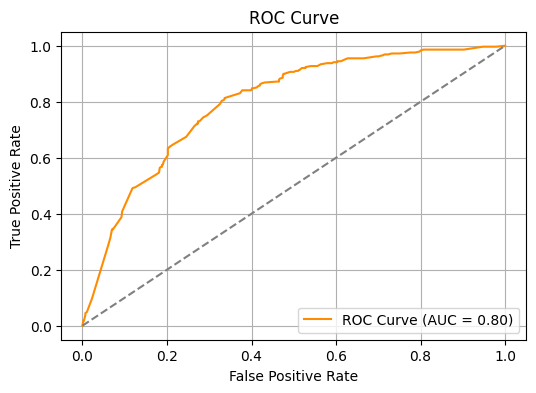

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get model probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("C:/Users/shazi/Healthcare_Project/output/roc_curve_day5.png")
plt.show()


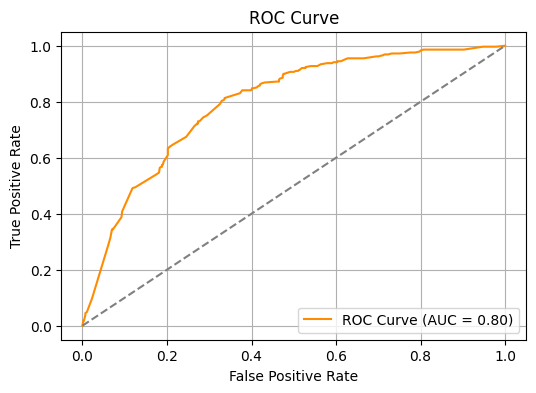

In [5]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


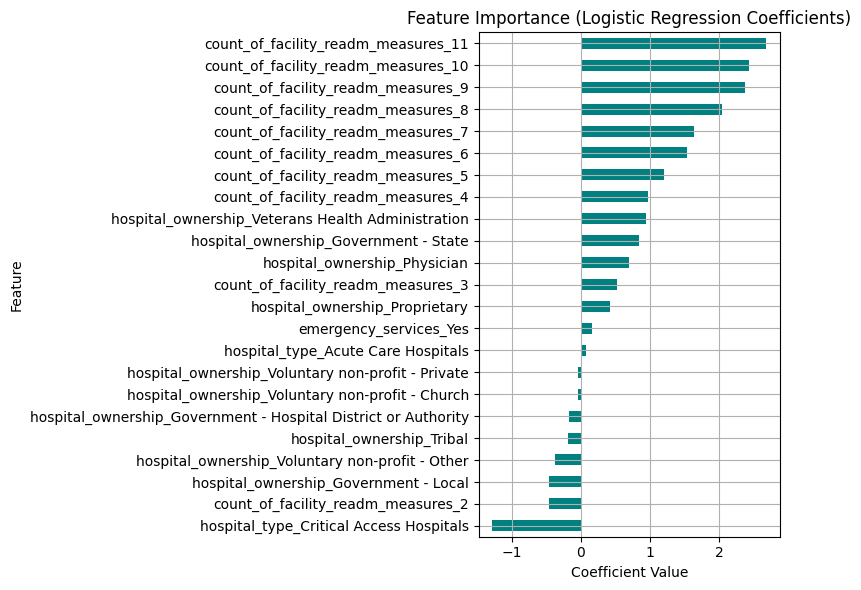

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values()

# Plot
plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/shazi/Healthcare_Project/output/feature_importance_day4.png")
plt.show()


In [9]:
import joblib
joblib.dump(model, "C:/Users/shazi/Healthcare_Project/models/logistic_readmission_model.pkl")


['C:/Users/shazi/Healthcare_Project/models/logistic_readmission_model.pkl']

In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("🔍 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


🔍 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       574
           1       0.59      0.59      0.59       289

    accuracy                           0.73       863
   macro avg       0.69      0.69      0.69       863
weighted avg       0.73      0.73      0.73       863



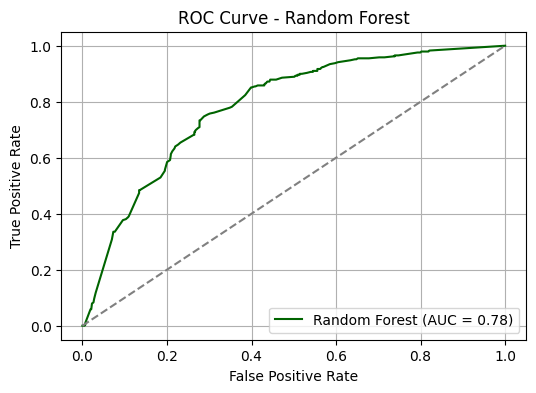

In [15]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("C:/Users/shazi/Healthcare_Project/output/roc_curve_random_forest.png")
plt.show()


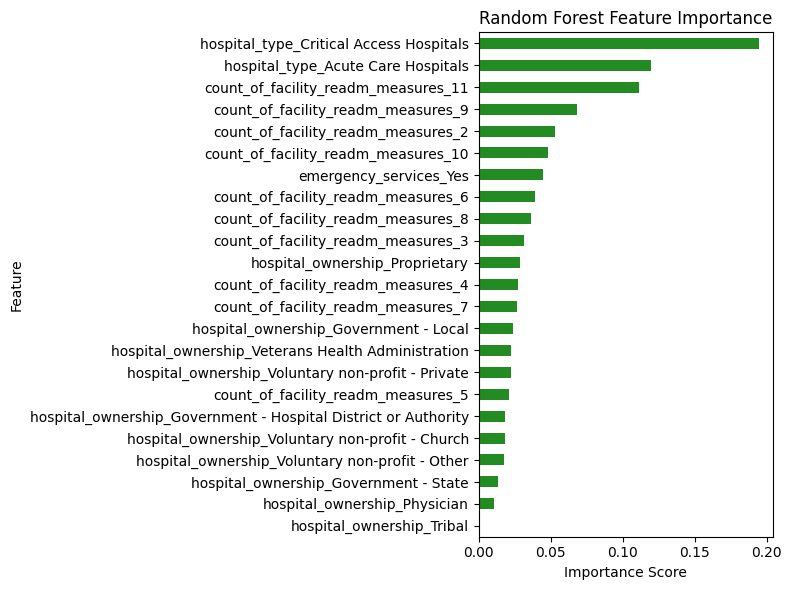

In [17]:
import pandas as pd

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values()

plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='forestgreen')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("C:/Users/shazi/Healthcare_Project/output/feature_importance_random_forest.png")
plt.show()


In [4]:
import joblib

joblib.dump(rf_model, "C:/Users/shazi/Healthcare_Project/models/random_forest_readmission_model.pkl")

['C:/Users/shazi/Healthcare_Project/models/random_forest_readmission_model.pkl']